## Required Packages

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation , BatchNormalization
from keras.layers import Conv2D , MaxPool2D , Flatten , Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers,models
!pip install wandb
import wandb
from wandb.keras import WandbCallback
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import keras
import cv2

     |████████████████████████████████| 1.8 MB 12.4 MB/s 
     |████████████████████████████████| 181 kB 51.9 MB/s 
     |████████████████████████████████| 144 kB 49.3 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=817e95ec682803e7a940a518bdfbfd28fe13c439d7c8d04a21d96e303e37e6d8
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


## One way to load data

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

## Other wat to load data

In [2]:
!curl -SL https://storage.googleapis.com/wandb_datasets/nature_12K.zip > nature_12K.zip
!unzip nature_12K.zip #unzip
train_dir='inaturalist_12K/train/' # all these info from provided dataset
test_dir='inaturalist_12K/val/'
classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']

Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_

## Visualizing the 10 clases images

(300, 300, 3)


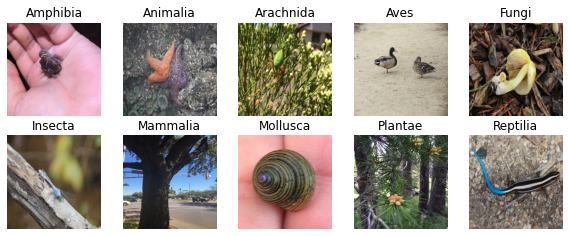

In [8]:
rows = 5
cols = 5
fig = plt.figure(figsize = (10,10))
i=1
for c in classes:
  class_dir=os.path.join(train_dir,c) #dir=inaturalist_12K/train/class_label
  for img in os.listdir(class_dir): #going through each image in class_dir. but we only need one image so break at the end.
    img_path=os.path.join(class_dir,img) # img_path = inaturalist_12K/train/class_label/image
    image=mpimg.imread(img_path) #The imread() function in pyplot module of matplotlib library 
    # is used to read an image from a file into an array.
    new_img=cv2.resize(image,(300,300)) # to malke all the images to the same size. we have used 300 x 300 in entire assignment
    fig.add_subplot(rows,cols,i)
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(c) # class label as title
    i=i+1
    break # we need only one image
print(new_img.shape)
  

## Preparing trining and validation data

In [9]:
def prepare_dataset():
    train_dir = 'inaturalist_12K/train/'
    test_dir = 'inaturalist_12K/val/'

    train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.1) # making instance
    valdata_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.1)

    train_data = train_datagen.flow_from_directory(train_dir, target_size=(300, 300), color_mode='rgb',class_mode='sparse',
                                                        shuffle=True, seed=123, subset='training')
    val_data = valdata_generator.flow_from_directory(train_dir, target_size=(300, 300), color_mode='rgb',class_mode='sparse',
                                                        shuffle=True, seed=123, subset='validation')
    # here we are not using any test data
    
    return train_data, val_data

In [10]:
prepare_dataset() # totally there are 9999 images in training folder

Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.


(<keras.preprocessing.image.DirectoryIterator at 0x7f3caf131dd0>,
 <keras.preprocessing.image.DirectoryIterator at 0x7f3caf131fd0>)

## Part- A 1st Question (Model consisting of 5 convolution layers)

In [11]:
def fivelayerCNN(no_of_filters, size_of_filters, activation_function,number_of_neurons_in_the_dense_layer):
    model = Sequential()
    model.add(Conv2D(no_of_filters[0], size_of_filters[0],input_shape=(300,300,3),activation=activation_function[0]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(no_of_filters[1], size_of_filters[1],activation=activation_function[1]))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(no_of_filters[2], size_of_filters[2],activation=activation_function[2]))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(no_of_filters[3], size_of_filters[3],activation=activation_function[3]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(no_of_filters[4], size_of_filters[4],activation=activation_function[4]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(number_of_neurons_in_the_dense_layer,activation=activation_function[5])) 
    model.add(Dropout(0.2))
    model.add(Dense(10, activation=activation_function[6]))
    return model



In [13]:
no_of_filters = [32,64,64,128,128] # we can change all these
size_of_filters = [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]
activation_function = ['relu','relu','relu','relu','relu','relu','softmax']
number_of_neurons_in_the_dense_layer = 128
model=fivelayerCNN(no_of_filters,size_of_filters,activation_function,number_of_neurons_in_the_dense_layer) # model is ready

In [14]:
train_data, val_data = prepare_dataset()
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss=[tf.keras.losses.SparseCategoricalCrossentropy()], metrics=['accuracy'])
hist=model.fit(train_data, epochs=5,validation_data=val_data)

Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Epoch 1/5
282/282 [==============================] - 150s 525ms/step - loss: 2.2385 - accuracy: 0.1651 - val_loss: 2.1236 - val_accuracy: 0.2292
Epoch 2/5
282/282 [==============================] - 146s 517ms/step - loss: 2.0901 - accuracy: 0.2451 - val_loss: 2.0358 - val_accuracy: 0.2873
Epoch 3/5
282/282 [==============================] - 148s 523ms/step - loss: 2.0134 - accuracy: 0.2862 - val_loss: 1.9983 - val_accuracy: 0.2993
Epoch 4/5
282/282 [==============================] - 145s 515ms/step - loss: 1.9656 - accuracy: 0.3088 - val_loss: 1.9824 - val_accuracy: 0.3123
Epoch 5/5
282/282 [==============================] - 144s 510ms/step - loss: 1.9358 - accuracy: 0.3127 - val_loss: 1.9657 - val_accuracy: 0.3283


## Part A 2nd Question (hyperparameter tuning using sweeps)

In [ ]:
'''# link: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)

flow_from_directory(
    directory, target_size=(256, 256), color_mode='rgb', classes=None,
    class_mode='categorical', batch_size=32, shuffle=True, seed=None,
    save_to_dir=None, save_prefix='', save_format='png',
    follow_links=False, subset=None, interpolation='nearest'
)'''


In [3]:
def preparing_data(batch_size_=32,augment=True):
    train_dir = 'inaturalist_12K/train/'
    test_dir = 'inaturalist_12K/val/'
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
    if augment:
        traindata_generator = ImageDataGenerator(rescale=1.0/255,
                                          rotation_range=30,
                                          height_shift_range=0.2,
                                          width_shift_range=0.2,
                                          zoom_range=0.2,
                                          shear_range=0.2,
                                          validation_split=0.1,
                                          horizontal_flip=True)

    else:
        traindata_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.1)
    valdata_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.1)
    
    testdata_generator = ImageDataGenerator(rescale=1./255) # test data dont need split

    train_data = traindata_generator.flow_from_directory(train_dir, target_size=(300, 300), color_mode='rgb',class_mode='sparse',
                                                        shuffle=True, seed=123, batch_size=batch_size_, subset='training')
    val_data = valdata_generator.flow_from_directory(train_dir, target_size=(300, 300), color_mode='rgb',class_mode='sparse',
                                                        shuffle=True, seed=123, subset='validation')
    test_data = testdata_generator.flow_from_directory(test_dir, target_size=(300, 300),color_mode='rgb',class_mode='sparse',
                                                        shuffle=True, seed=123)
    
    return train_data, val_data, test_data;

In [ ]:
train_data, val_data, test_data=preparing_data(augment=True,batch_size_=128) #test data consist of 2000 images

Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


## Augmented images

(300, 300, 3)

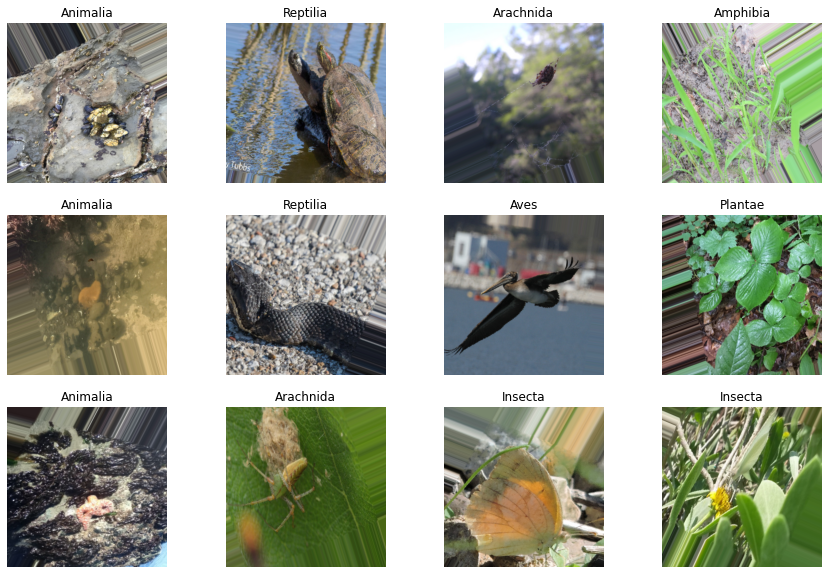

In [ ]:
#visualizing Augmented images
fig = plt.figure(figsize=(15,10))
rows,columns=3,4
i=1
imgs, labels = next(train_data)
for img,label in zip(imgs,labels):
  if i<13:
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(classes[int(label)])
    i=i+1  
img.shape

## Model

In [ ]:
def main_model(filter_org, dropout,dense_size,batch_norm):
    model = Sequential()
    if filter_org == 'same':
        no_of_filters=[64,64,64,64,64]
    elif filter_org=='double' :
        no_of_filters=[32,64,128,256,512]
    elif filter_org == 'half' :
        no_of_filters=[512,256,128,64,8]
    elif filter_org == 'p1' :
        no_of_filters=[32,64,64,128,128]
    elif filter_org == 'p2' :
        no_of_filters=[128,128,128,64,64]

    for i in range(5):
        if i==0:
            model.add(Conv2D(no_of_filters[i], (3,3), input_shape=(300, 300, 3)))
        else:
            model.add(Conv2D(no_of_filters[i], (3,3)))
        if batch_norm:
            model.add(BatchNormalization())
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(dense_size))
    model.add(Dropout(dropout))
    model.add(Activation("relu"))
    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    return model



## sweep configuration with all necessary parameters

In [ ]:
sweep_config = {
    'name': 'sweep1.1',
    'method': 'grid', #random, bayes, grid
    'metric' : {
    'name': 'val_accuracy',
    'goal': 'maximize'   
    },
    'parameters': {
        
        'filter_org': {
            'values': ['double']
        },
        'dense_size':{
            'values':[256,64,128]
        },
        'batch_norm':{
            'values':['yes','no']
        },
        'augment':{
            'values':[True,False]   
        },
        'dropout':{
            'values':[0.2,0.4]
        },
        'batch_size_':{
            'values':[32,64]
        },
        'learing_rate':{
            'values':[0.0005]
        },
        'epochs':{
            'values':[3]
        }
           
    }
}


## Generating Sweep Id

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="Temp")

Create sweep with ID: 5xajddib
Sweep URL: https://wandb.ai/cs21m009/temp/sweeps/5xajddib


In [ ]:
def train():

    config_defaults = {
        "filter_org": 'same',
        "dense_size": 64,
        "batch_norm": True,
        "augment": False,
        "dropout": 0.4,
        "batch_size_": 128,
        "learing_rate": 0.001,
        "epochs": 10
    }

    wandb.init(config=config_defaults)
    config = wandb.config
    wandb.init(name="fo_"+str(config.filter_org)+"_aug_"+str(config.augment)+"_do_"+str(config.dropout)+
               "_bn_"+str(config.batch_norm)+"_bs_"+str(config.batch_size_)+"_lr_"+str(config.learing_rate))

    train_data, val_data, test_data = preparing_data(augment=config.augment,batch_size_=config.batch_size_)
    model = main_model(filter_org=config.filter_org,
                       dropout=config.dropout, batch_norm=config.batch_norm, dense_size=config.dense_size)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(config.learing_rate), loss=[tf.keras.losses.SparseCategoricalCrossentropy()], metrics=['accuracy'])
    model.fit(train_data, epochs=config.epochs, validation_data=val_data, callbacks=[WandbCallback()])

In [ ]:
wandb.agent(sweep_id, train)

## Q4.a: Validation on testing data with best hyperparameters and reporting accuracy

In [ ]:
# Best hyperparameters we observed
train_data, val_data, test_data = preparing_data(batch_size_=64,augment=False)
model = Sequential()
no_of_filters=[32,64,64,128,128]
for i in range(5):
    if i==0:
        model.add(Conv2D(no_of_filters[i], (5,5), input_shape=(300, 300, 3)))
    else:
        model.add(Conv2D(no_of_filters[i], (5,5)))
    #model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.4))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss=[tf.keras.losses.SparseCategoricalCrossentropy()], metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)
model.fit(train_data, epochs=20, validation_data=val_data,callbacks=[early_stop])


Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/20
141/141 [==============================] - 153s 1s/step - loss: 2.2714 - accuracy: 0.1437 - val_loss: 2.2113 - val_accuracy: 0.1962
Epoch 2/20
141/141 [==============================] - 140s 995ms/step - loss: 2.2042 - accuracy: 0.1938 - val_loss: 2.1551 - val_accuracy: 0.2082
Epoch 3/20
141/141 [==============================] - 140s 988ms/step - loss: 2.1408 - accuracy: 0.2239 - val_loss: 2.0857 - val_accuracy: 0.2723
Epoch 4/20
141/141 [==============================] - 139s 982ms/step - loss: 2.0939 - accuracy: 0.2479 - val_loss: 2.0433 - val_accuracy: 0.2763
Epoch 5/20
141/141 [==============================] - 140s 993ms/step - loss: 2.0616 - accuracy: 0.2621 - val_loss: 2.0423 - val_accuracy: 0.2723
Epoch 6/20
141/141 [==============================] - 139s 983ms/step - loss: 2.0257 - accuracy: 0.2830 - val_loss: 1.9902 - val_accuracy: 0.3003

## Printing test data accuracy with best parameter model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test accuracy ",test_accuracy)

63/63 [==============================] - 28s 450ms/step - loss: 1.8018 - accuracy: 0.3735
Test accuracy  0.3734999895095825


## Q4.b 10 x 3 image grid

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


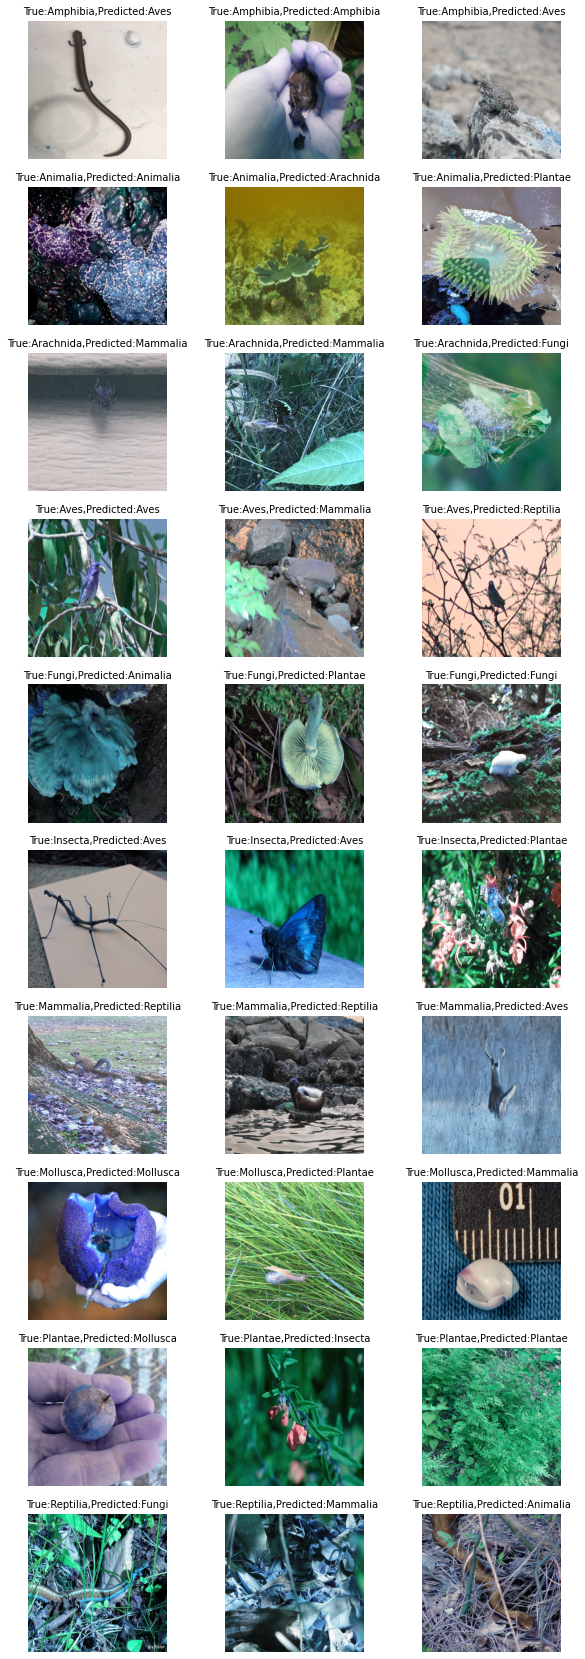

In [ ]:
#Taking 3 images from each class, So totally 30 images 

images=[]
original_label=[]
predicted_label=[]
for c in classes:
    i=0
    path=os.path.join(test_dir,c) # inaturalist_12K/val/class_label
    for img in os.listdir(path): # taking only 3 images for each class
      if i==3:
        break
      else:
        image = cv2.imread(os.path.join(path,img))
        images.append(image)
        original_label.append(c)
        temp = cv2.resize(image, (300,300)) / 255.0 # because we have made all the images of same size 300 x 300
        model_out=model.predict(temp.reshape(1,300,300,3)) # we have used softmax at output so it gives PD over 10 clasess
        model_predicted=model_out.argmax() # to get predicted label
        predicted_label.append(classes[model_predicted]) # to get the class name of the label 
        i=i+1

#plotting a 10x3 grid with predictions
fig = plt.figure(figsize=(10,30))
rows=10
columns=3
temp=1
for k in range(30):
  image=cv2.resize(images[k],(300,300))
  fig.add_subplot(rows,columns,temp)
  plt.imshow(image)
  plt.axis('off')
  plt.title('True:'+original_label[k]+',Predicted:'+predicted_label[k],fontdict={'fontsize':10})
  temp=temp+1
wandb.init(entity='cs21m009',project='DL_A2_partA')
wandb.log({'predicting on sample images':plt}) 

In [ ]:
'''OpenCV-Python is a library of Python bindings designed to solve computer vision problems.
cv2.imread() method loads an image from the specified file. If the image cannot be read (because of missing file, improper permissions, unsupported or invalid format) then this method returns an empty matrix.

    Syntax: cv2.imread(path, flag)

    Parameters:
    path: A string representing the path of the image to be read.
    flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR

    Return Value: This method returns an image that is loaded from the specified file.'''

'OpenCV-Python is a library of Python bindings designed to solve computer vision problems.\ncv2.imread() method loads an image from the specified file. If the image cannot be read (because of missing file, improper permissions, unsupported or invalid format) then this method returns an empty matrix.\n\n    Syntax: cv2.imread(path, flag)\n\n    Parameters:\n    path: A string representing the path of the image to be read.\n    flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR\n\n    Return Value: This method returns an image that is loaded from the specified file.'

##  Visualising all the filters in the first layer of the best model

In [ ]:
layer = model.layers[0]
filters, biases = layer.get_weights()
print("First layer filter size: ",filters.shape)
print("Shape of each filter: ",filters.shape[:-1])
print("Number of filters: ",filters.shape[-1])

print("one two dimenstional values of first filter ")
print(filters[:, :, 1, 1])

First layer filter size:  (5, 5, 3, 32)
Shape of each filter:  (5, 5, 3)
Number of filters:  32
one two dimenstional values of first filter 
[[ 0.04936535  0.04033838  0.01407971 -0.04197791 -0.01946271]
 [ 0.05140589 -0.08426173  0.00980744 -0.00383842 -0.03978759]
 [-0.08149693 -0.07926528 -0.0326102   0.05490159  0.00910775]
 [-0.059552   -0.04321259 -0.03230244 -0.05718155  0.07369754]
 [ 0.04010094  0.07399382  0.06433349 -0.07075589  0.06975353]]


Filter Number 1
Filter Number 2
Filter Number 3
Filter Number 4
Filter Number 5
Filter Number 6
Filter Number 7
Filter Number 8
Filter Number 9
Filter Number 10
Filter Number 11
Filter Number 12
Filter Number 13
Filter Number 14
Filter Number 15
Filter Number 16
Filter Number 17
Filter Number 18
Filter Number 19
Filter Number 20
Filter Number 21
Filter Number 22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Filter Number 23
Filter Number 24
Filter Number 25
Filter Number 26
Filter Number 27
Filter Number 28
Filter Number 29
Filter Number 30
Filter Number 31
Filter Number 32


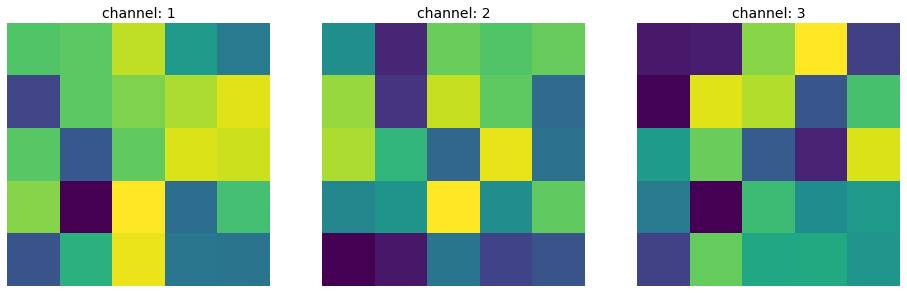

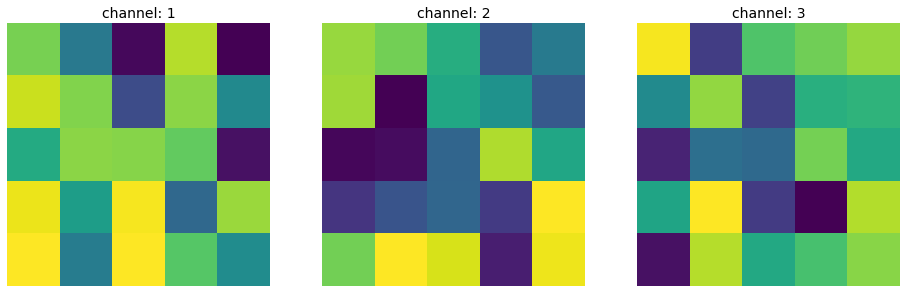

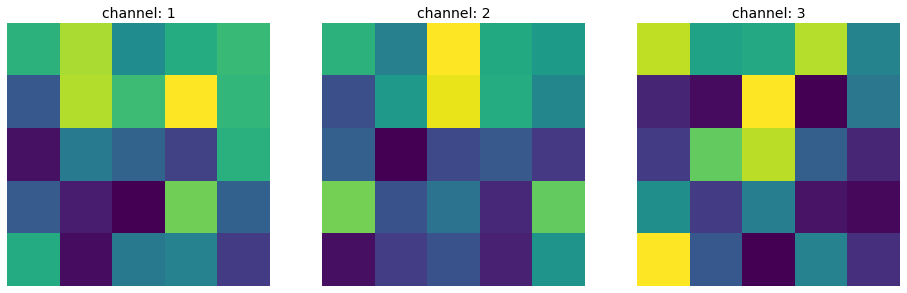

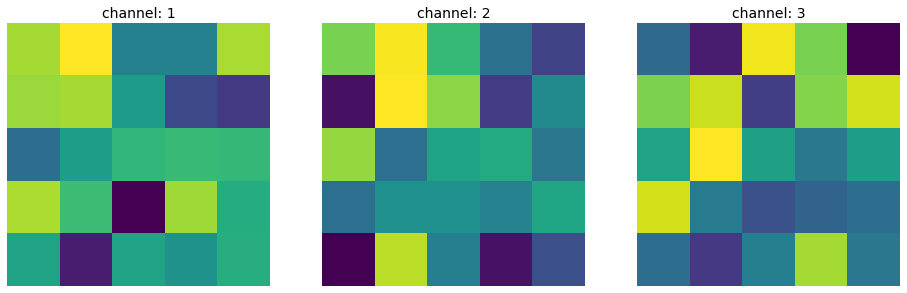

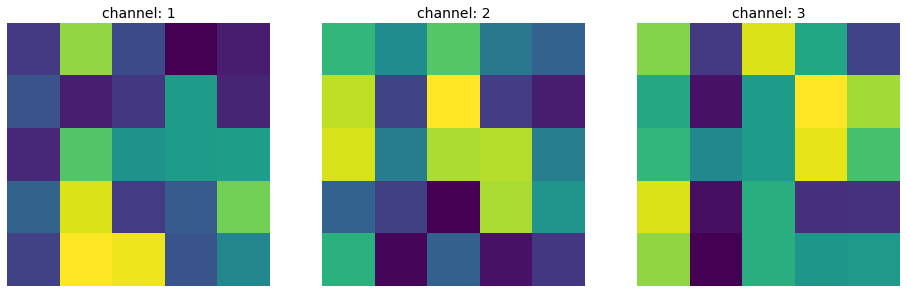

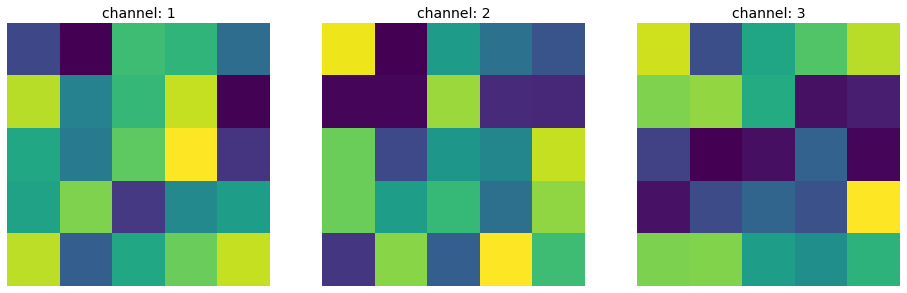

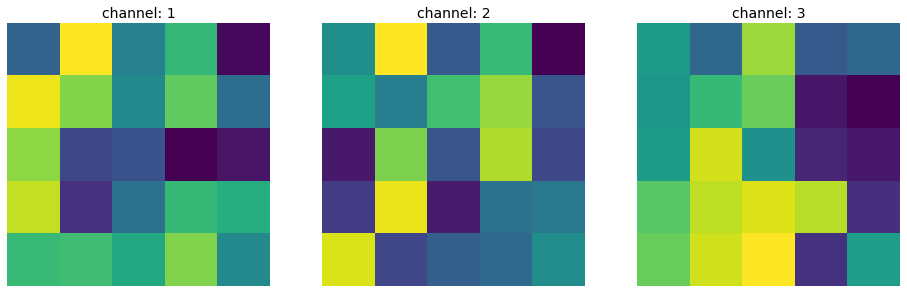

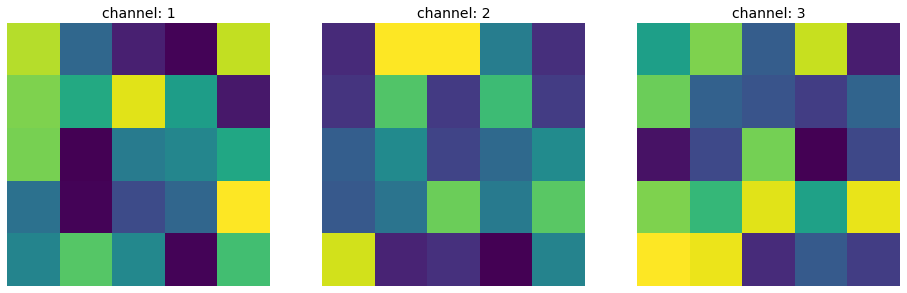

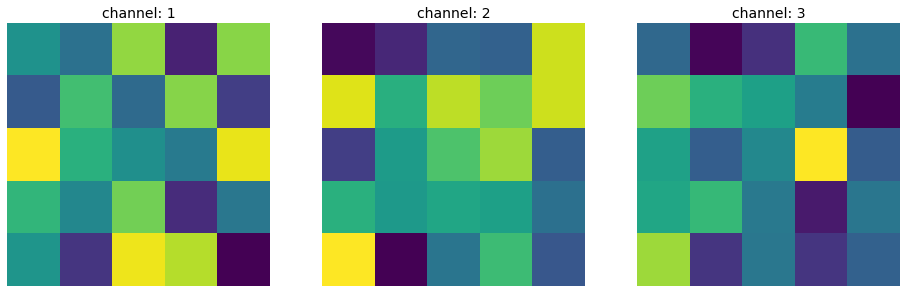

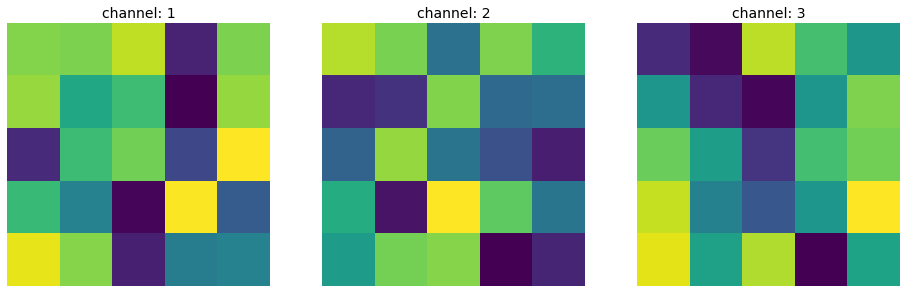

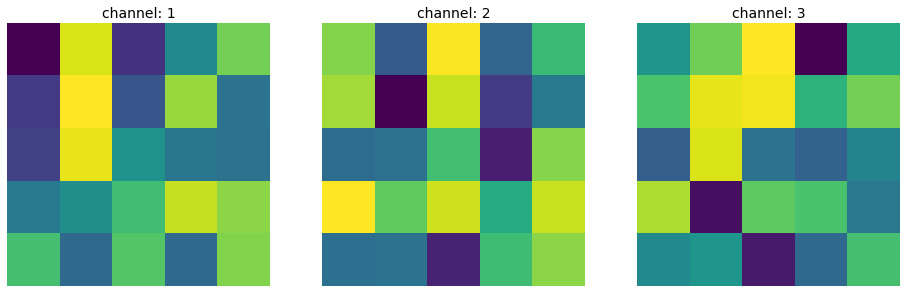

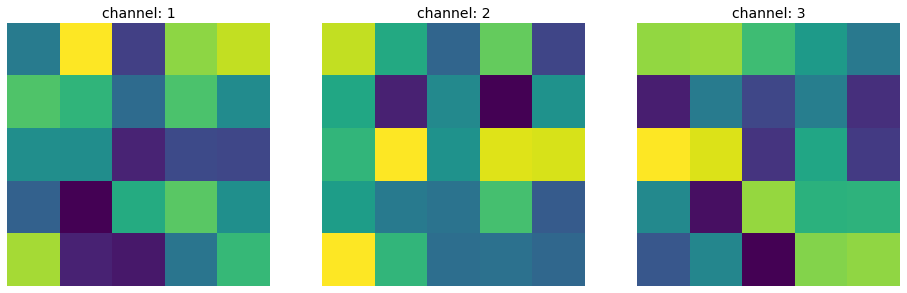

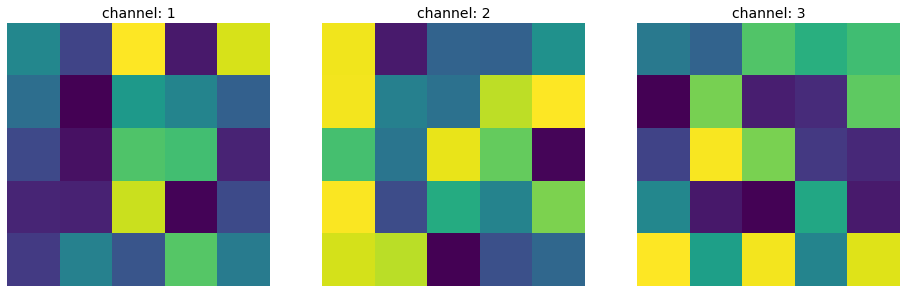

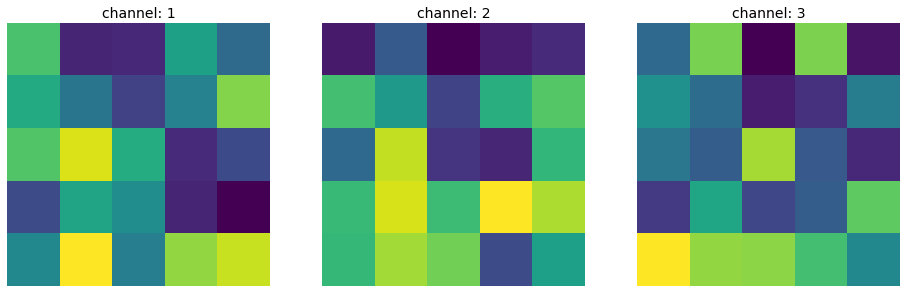

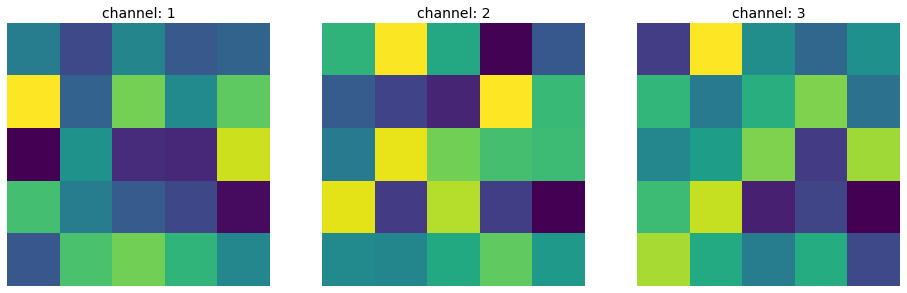

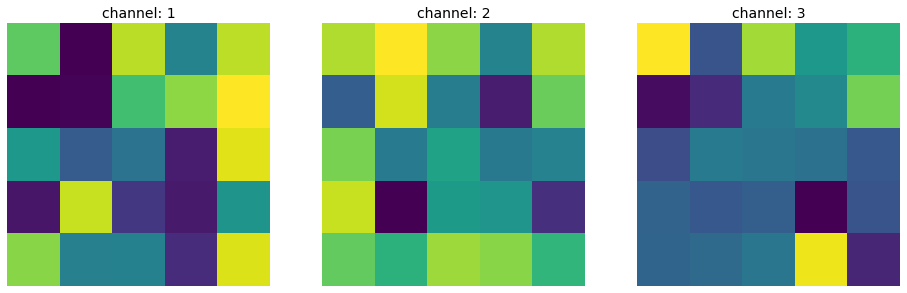

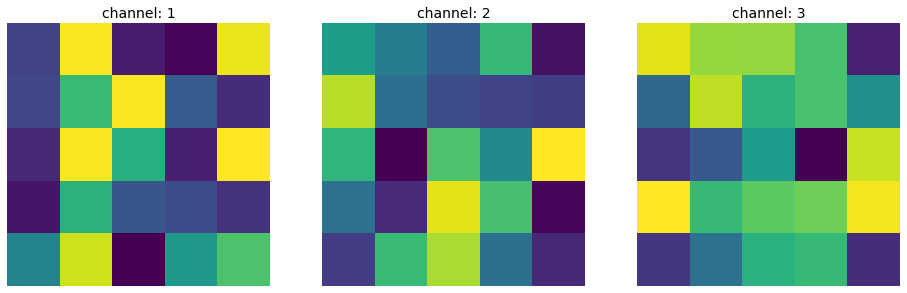

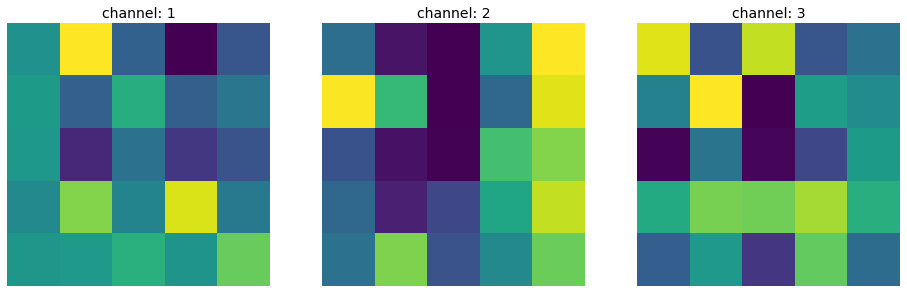

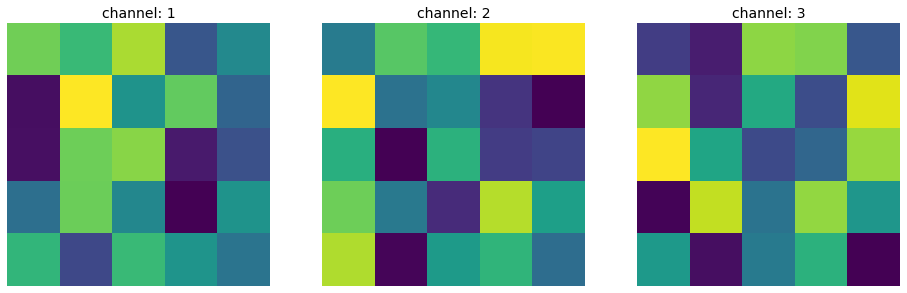

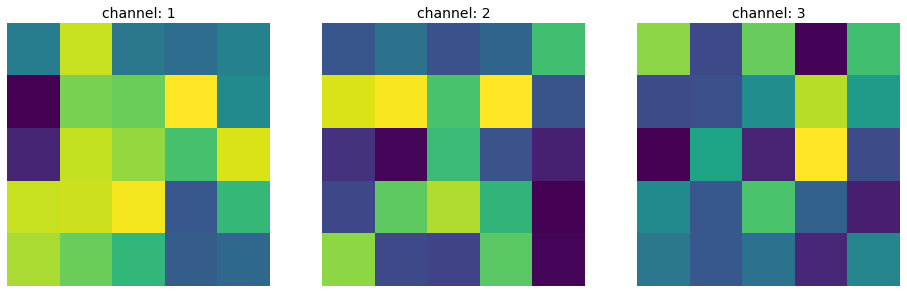

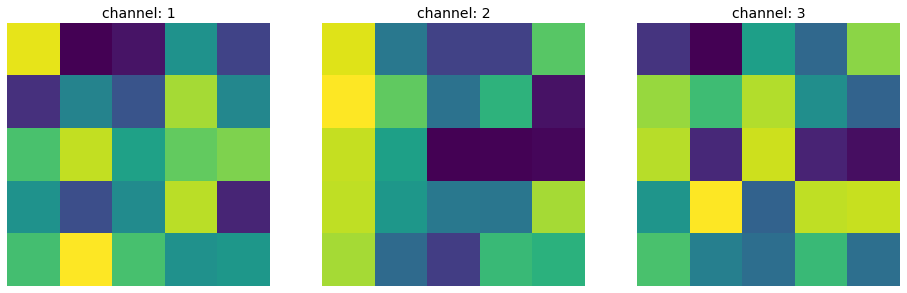

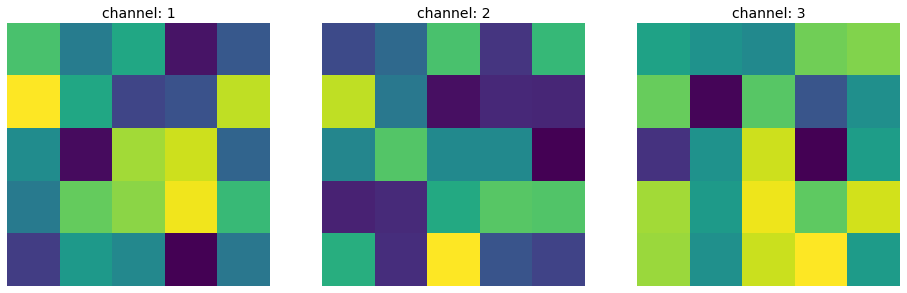

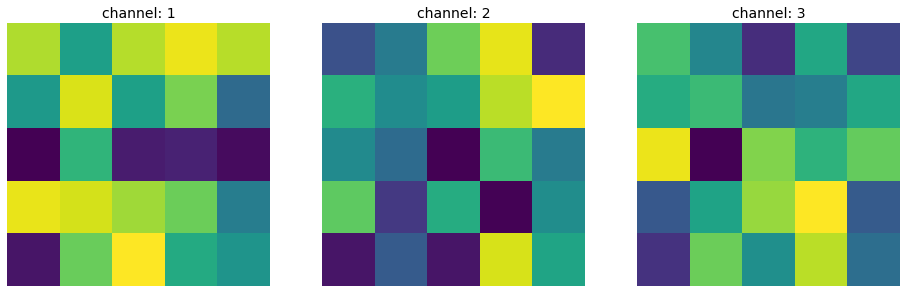

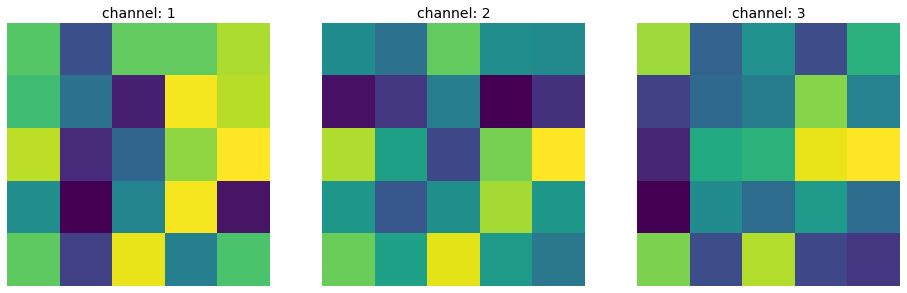

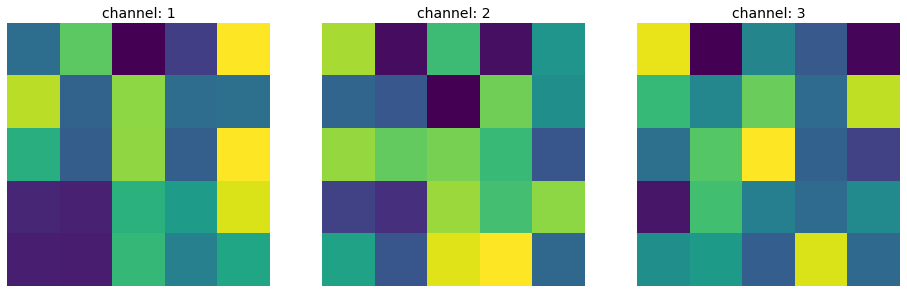

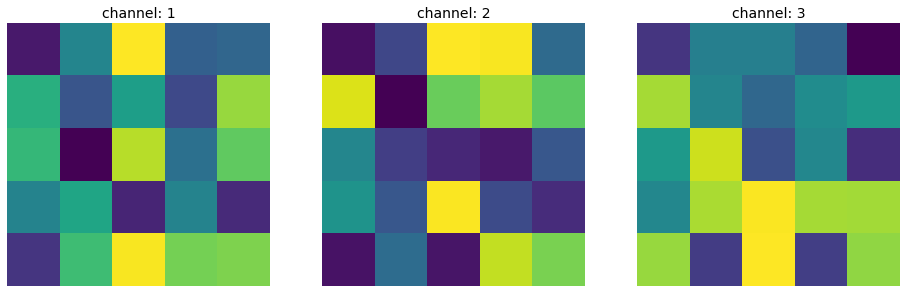

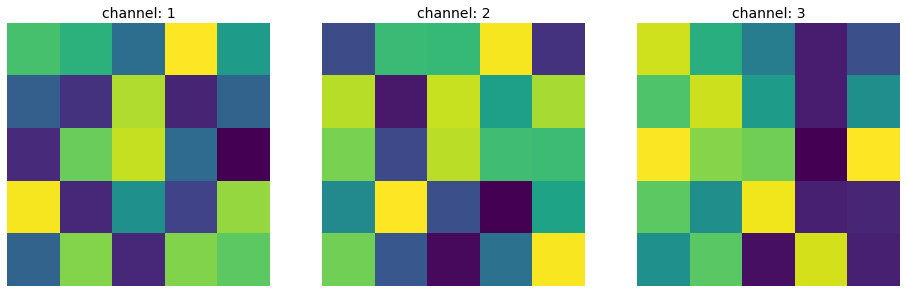

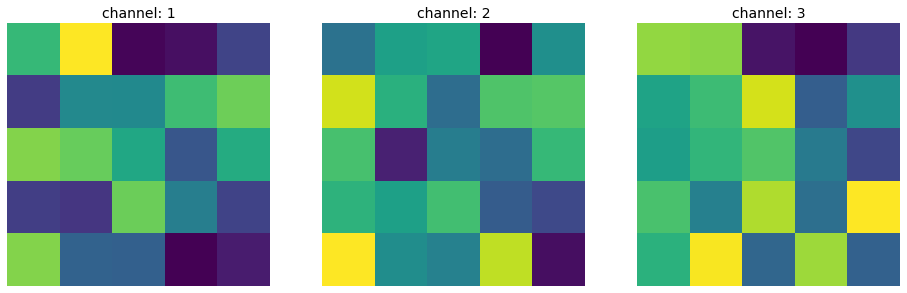

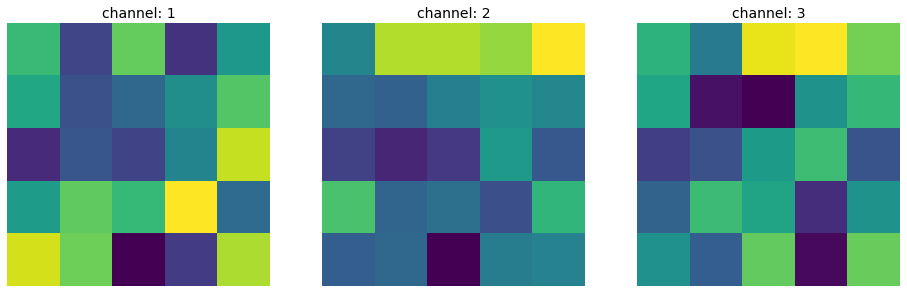

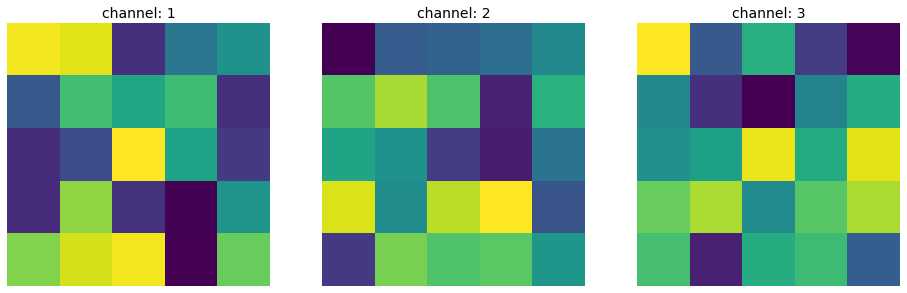

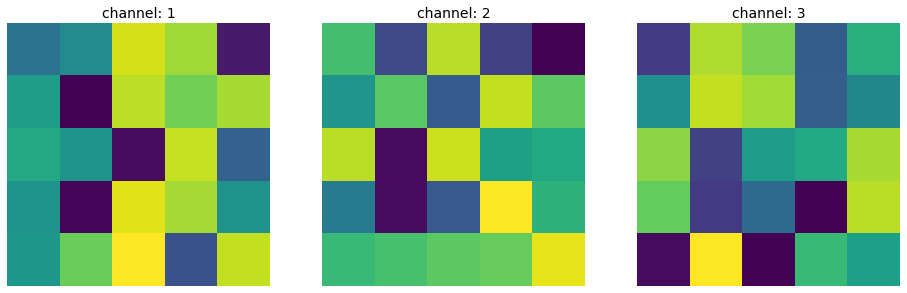

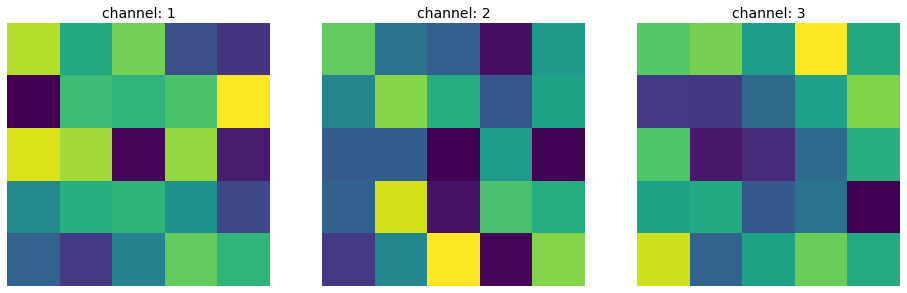

In [ ]:
# 32 filters each with 3 2-D images total 32*3=96 images
wandb.init(entity='cs21m009',project='DL_A2_partA')
noof_filters = filters.shape[-1]
for i in range(noof_filters):
    print("Filter Number",i+1)
    plt.figure(figsize=(16, 5))
    for j in range(3): # for each channel one 2-D image so totally we get 3 images for 1 filter
        f = filters[:, :, j, i]
        plt.subplot(1, 3, j+1)
        plt.imshow(f)
        plt.axis("off")
        plt.title(f"channel: {j+1}", size=14)
    #plt.show()
    wandb.log({'Visualising all the filters in the first layer':plt}) 

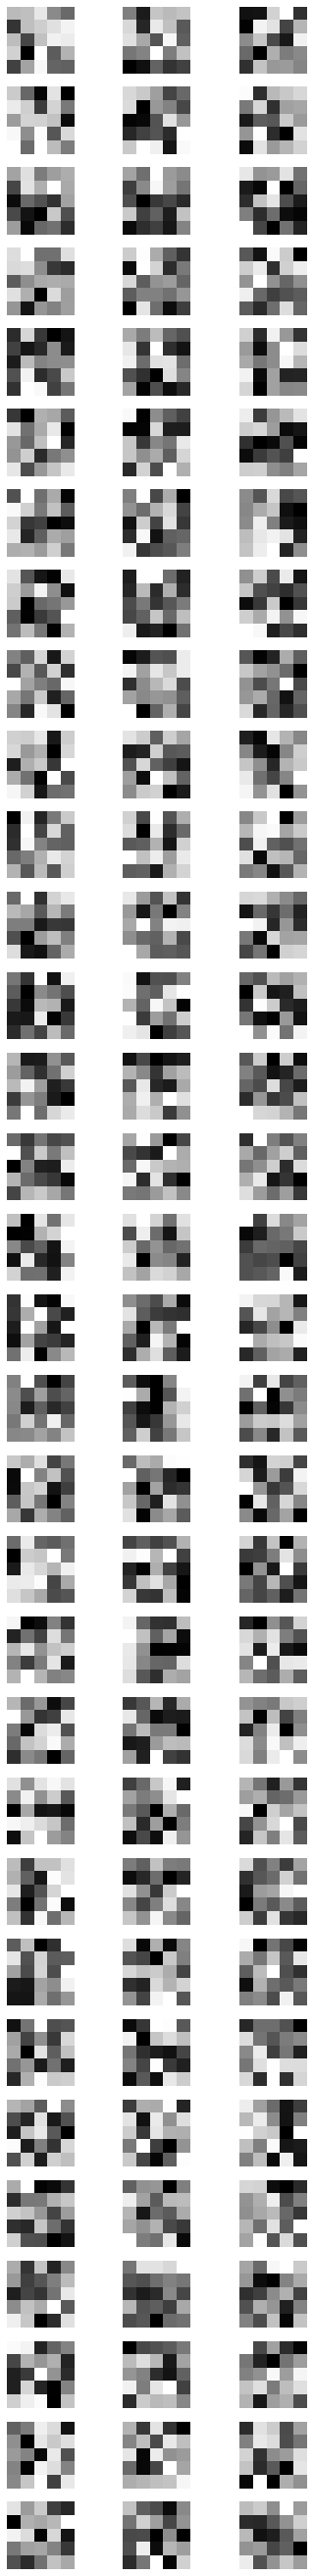

In [ ]:
k = 1
plt.figure(figsize=(6, 48))
num_filters = filters.shape[-1]
for i in range(num_filters):
    for j in range(3):
        f = filters[:, :, j, i]
        plt.subplot(num_filters, 3, k)
        k = k + 1
        plt.imshow(f, cmap="gray")
        plt.axis("off")
plt.show()
#wandb.init(entity='cs21m009',project='DL_A2_partA')
#wandb.log({'Visualising all the filters in the first layer':plt}) 

In [4]:
# Best hyperparameters we observed
train_data, val_data, test_data = preparing_data(batch_size_=64,augment=False)
model = Sequential()
no_of_filters=[32,64,64,128,128]
for i in range(5):
    if i==0:
        model.add(Conv2D(no_of_filters[i], (5,5), input_shape=(300, 300, 3)))
    else:
        model.add(Conv2D(no_of_filters[i], (5,5)))
    #model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.4))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss=[tf.keras.losses.SparseCategoricalCrossentropy()], metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)
model.fit(train_data, epochs=5, validation_data=val_data,callbacks=[early_stop])


Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/5
141/141 [==============================] - 174s 1s/step - loss: 2.2751 - accuracy: 0.1297 - val_loss: 2.1958 - val_accuracy: 0.2062
Epoch 2/5
141/141 [==============================] - 150s 1s/step - loss: 2.1640 - accuracy: 0.2161 - val_loss: 2.0873 - val_accuracy: 0.2492
Epoch 3/5
141/141 [==============================] - 148s 1s/step - loss: 2.1055 - accuracy: 0.2466 - val_loss: 2.0896 - val_accuracy: 0.2523
Epoch 4/5
141/141 [==============================] - 147s 1s/step - loss: 2.0555 - accuracy: 0.2702 - val_loss: 2.0382 - val_accuracy: 0.2883
Epoch 5/5
141/141 [==============================] - 147s 1s/step - loss: 2.0201 - accuracy: 0.2852 - val_loss: 2.0117 - val_accuracy: 0.2943


In [5]:
# print the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 32)      2432      
                                                                 
 activation (Activation)     (None, 296, 296, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 144, 64)      51264     
                                                                 
 activation_1 (Activation)   (None, 144, 144, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 64)       0         
 2D)                                                    

## Q5. Guided backpropagation

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
(32, 300, 300, 3)


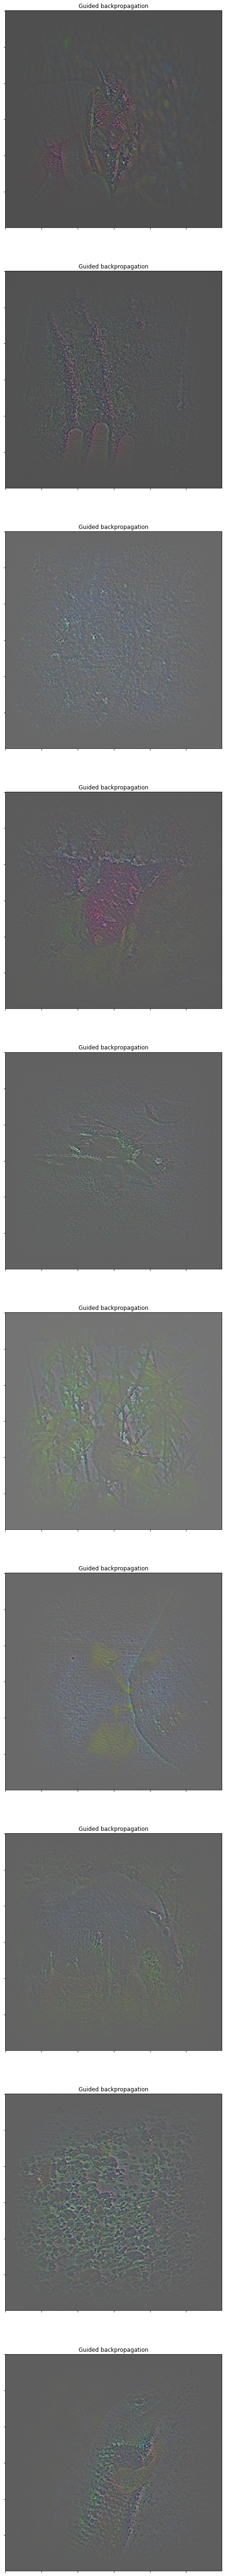

In [6]:
wandb.init(entity='cs21m009',project='DL_A2_partA')
# preparing data NOTE: I am using only test data here. Not used train data.
train_data, val_data, test_data = preparing_data(batch_size_=64,augment=False)

''' from the model summary convolution layers are names are: 
conv2d: 1st layer
conv2d_1: 2nd layer
conv2d_2: 3nd layer
conv2d_3: 4th layer
conv2d_4: 5th layer -> This is what we need '''


img_random = np.random.randint(22) 
print(test_data[0][0].shape)

#fig, axs = plt.subplots(10, 1, figsize = (10, 100))
# taking upto 5th conv layer
model_upto_conv5 = tf.keras.models.Model([model.inputs],[model.get_layer("conv2d_4").output])

# creating a custom gradient to track actual non-zero gradients
@tf.custom_gradient
def guidedRelU(x):
    def grad(dy):
        return tf.cast(dy>0, tf.float32) * tf.cast(x>0, tf.float32) * dy
    return tf.nn.relu(x), grad

for layer in model.layers[1:]:
    if hasattr(layer, 'activation') and layer.activation==tf.keras.activations.relu:
        layer.activation = guidedRelU

# plotting the images
fig, axs = plt.subplots(10, 1, figsize=(10, 100))
inputs = tf.convert_to_tensor(test_data[0][0][img_random:img_random+10], dtype=tf.float32)

for i in range(10):

    with tf.GradientTape() as tape:
        input = tf.expand_dims(inputs[i], 0)
        tape.watch(input)
        output = model_upto_conv5(input)[0]
        
    gradients = tape.gradient(output,input)[0]

    axs[i].set_title("Guided backpropagation")
    img_arr = np.array((gradients-np.min(gradients))/(np.max(gradients)-np.min(gradients))).reshape(300,300,3)
    axs[i].imshow(img_arr)
    axs[i].set_yticklabels([])
    axs[i].set_xticklabels([])
#plt.show() 
wandb.log({'guided back propagation':plt})